# Shipment Pricing Prediction
**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Data Cleaning
* Exploratory data analysis
* Data Pre-Processing
* Model Training 
* Choose best model

## 1) Problem statement.

- You work for a company that sells sculptures that are acquired from various artists around the world. Your task is to predict the cost required to ship these sculptures to customers based on the information provided in the dataset.

### 2)  Import Data 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Import the CSV Data as Pandas DataFrame**

In [2]:
df = pd.read_csv('data/shipment.csv')

**Show Top 5 Records**

In [3]:
df.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


**Shape of the dataset**

In [4]:
df.shape

(6500, 20)

**Summary of the dataset**

In [5]:
# Display summary statistics for a dataframe
df.describe()

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
count,5750.000000,6125.000000,5916.000000,5.913000e+03,6500.00000,6500.000000,6.500000e+03
mean,0.461850,21.766204,9.617647,4.006948e+05,1192.42009,37.407174,1.713920e+04
std,0.265781,11.968192,5.417000,2.678081e+06,8819.61675,26.873519,2.406579e+05
min,0.000000,3.000000,2.000000,3.000000e+00,3.00000,10.000000,-8.801727e+05
25%,0.240000,12.000000,6.000000,5.030000e+02,5.23000,16.700000,1.884400e+02
50%,0.450000,20.000000,8.000000,3.102000e+03,8.02500,23.505000,3.820650e+02
75%,0.680000,30.000000,12.000000,3.645600e+04,89.47000,57.905000,1.156115e+03
max,1.000000,73.000000,50.000000,1.179279e+08,382385.67000,99.980000,1.114343e+07


Purpose: This cell generates a summary of the numeric columns in the dataset, including:

1. count: Number of non-null observations in each column.
2. mean: The average value for each numeric column.
3. std: Standard deviation, which indicates the amount of variance or dispersion from the mean.
4. min, 25%, 50%, 75%, and max: These are the minimum, 1st quartile (25%), median (50%), 3rd quartile (75%), and maximum values for each column.

Key Observations:

1. Artist Reputation: Ranges from 0 to 1, with an average of 0.461.
2. Height, Width, and Weight: These physical characteristics have wide ranges, indicating variability in the size and weight of the sculptures.
3. Cost:  maximum cost exceeds 880172

### Statistical Inferences
- Median Price Of Sculpture is 1192.
- 25% of the population is Price Of Sculpture below 5
- Average Artist Reputation of the population is 0.46

* The difference between 75th percentile and Max also suggests the skewness 

* We can confirm the insights we got from data distribution, as skewness is more for Height, Width, and Base Shipping Price, and skewness of Weight, Price of Sculpture because of Outliers 

**Check Datatypes in the dataset**

In [6]:
df.dtypes

Customer Id               object
Artist Name               object
Artist Reputation        float64
Height                   float64
Width                    float64
Weight                   float64
Material                  object
Price Of Sculpture       float64
Base Shipping Price      float64
International             object
Express Shipment          object
Installation Included     object
Transport                 object
Fragile                   object
Customer Information      object
Remote Location           object
Scheduled Date            object
Delivery Date             object
Customer Location         object
Cost                     float64
dtype: object

## 3. EXPLORING DATA

**Most of the features seems to be of object data type, Now let's seperate Categorical and numerical columns**

In [7]:
target_feature = 'Cost'

In [8]:
target_feature

'Cost'

In [9]:
df.columns

Index(['Customer Id', 'Artist Name', 'Artist Reputation', 'Height', 'Width',
       'Weight', 'Material', 'Price Of Sculpture', 'Base Shipping Price',
       'International', 'Express Shipment', 'Installation Included',
       'Transport', 'Fragile', 'Customer Information', 'Remote Location',
       'Scheduled Date', 'Delivery Date', 'Customer Location', 'Cost'],
      dtype='object')

In [10]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))


We have 7 numerical features : ['Artist Reputation', 'Height', 'Width', 'Weight', 'Price Of Sculpture', 'Base Shipping Price', 'Cost']

We have 13 categorical features : ['Customer Id', 'Artist Name', 'Material', 'International', 'Express Shipment', 'Installation Included', 'Transport', 'Fragile', 'Customer Information', 'Remote Location', 'Scheduled Date', 'Delivery Date', 'Customer Location']


## Univariate Analysis

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

### Numerical Features

Kernel Density Estimation (KDE) is a way to guess what the overall shape of your data looks like. It helps you figure out where your data points are concentrated and gives you a smooth curve to visualize that.

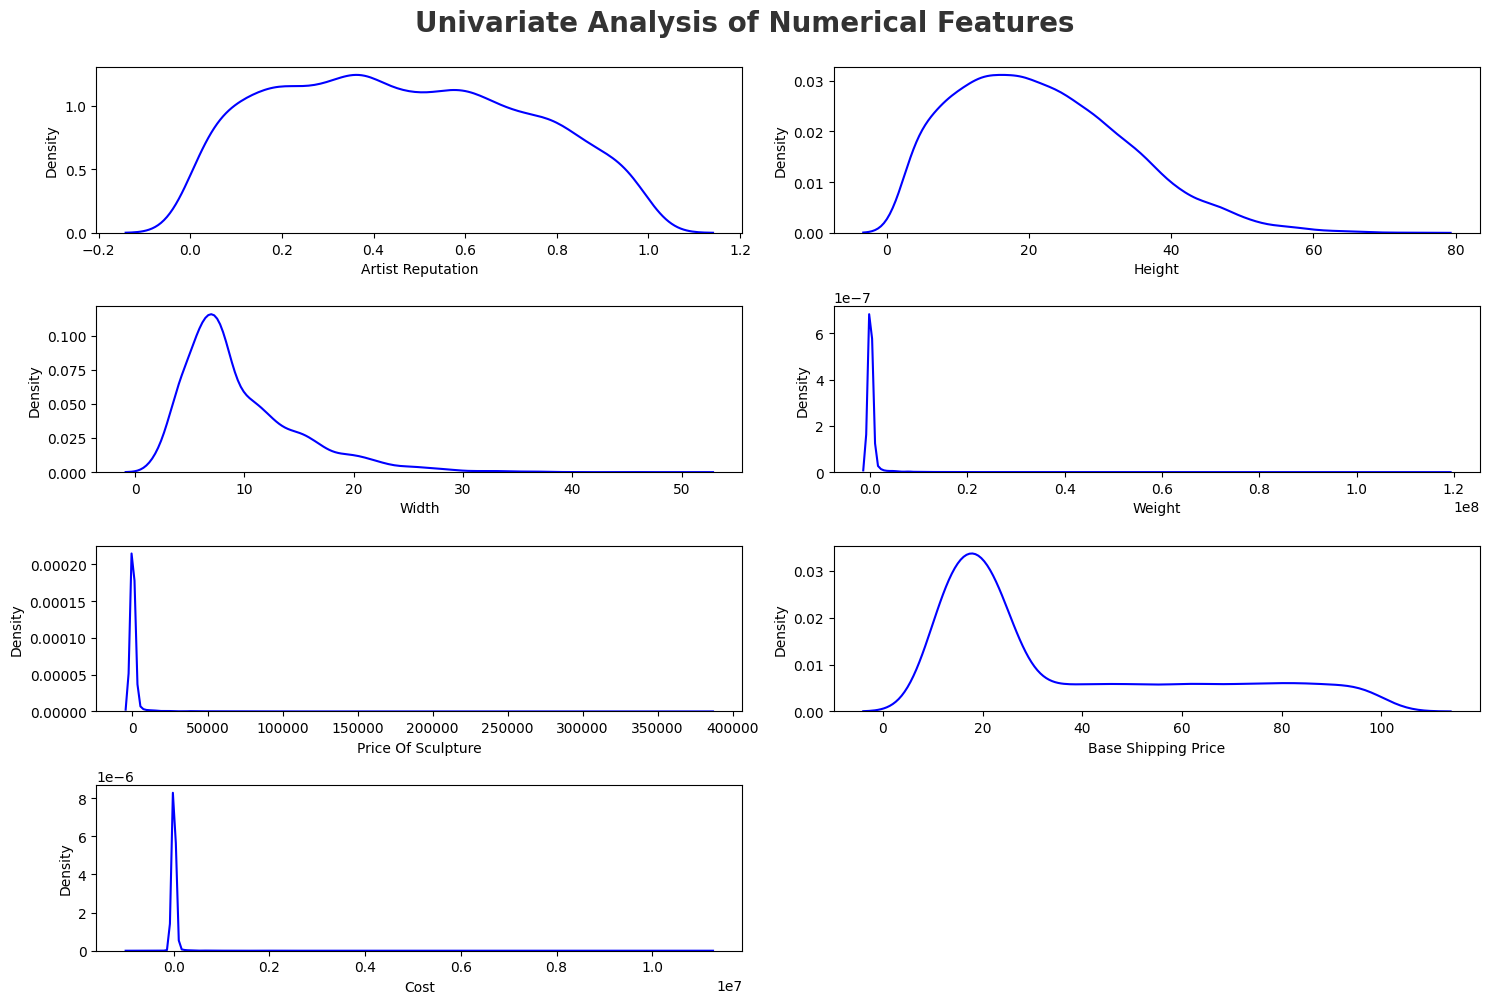

In [11]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(4, 2, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

<font size=3>**Report**</font> 

* <font size=3> `Height`, `Width` and `Base Shipping price` are positively skewed</font> 

* <font size=3>`Weight`, `Price of Sculpture` has many outliers</font> 

### Categorical Features

In [12]:
df.describe()

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
count,5750.000000,6125.000000,5916.000000,5.913000e+03,6500.00000,6500.000000,6.500000e+03
mean,0.461850,21.766204,9.617647,4.006948e+05,1192.42009,37.407174,1.713920e+04
std,0.265781,11.968192,5.417000,2.678081e+06,8819.61675,26.873519,2.406579e+05
min,0.000000,3.000000,2.000000,3.000000e+00,3.00000,10.000000,-8.801727e+05
25%,0.240000,12.000000,6.000000,5.030000e+02,5.23000,16.700000,1.884400e+02
50%,0.450000,20.000000,8.000000,3.102000e+03,8.02500,23.505000,3.820650e+02
75%,0.680000,30.000000,12.000000,3.645600e+04,89.47000,57.905000,1.156115e+03
max,1.000000,73.000000,50.000000,1.179279e+08,382385.67000,99.980000,1.114343e+07


In [13]:
categorical_features

['Customer Id',
 'Artist Name',
 'Material',
 'International',
 'Express Shipment',
 'Installation Included',
 'Transport',
 'Fragile',
 'Customer Information',
 'Remote Location',
 'Scheduled Date',
 'Delivery Date',
 'Customer Location']

In [14]:
categorical_columns = []
for i in categorical_features:
    print(f'{i}: {len(df[i].unique())}')
    if len(df[i].unique()) < 10:
        categorical_columns.append(i)
        

Customer Id: 6500
Artist Name: 6449
Material: 8
International: 2
Express Shipment: 2
Installation Included: 2
Transport: 4
Fragile: 2
Customer Information: 2
Remote Location: 3
Scheduled Date: 1660
Delivery Date: 1664
Customer Location: 6500


* `Customer Id`, `Artist Name`, `Customer location` have 6500 unique values, so they can be dropped

* `Scheduled date` and `Delivery date` needs feature engineering

The condition if len(df[i].unique()) < 10 is used to automatically classify a column as "categorical" if it has fewer than 10 unique values. Here's the reasoning behind this:

Why This Condition?

Categorical Data:

1. Categorical columns usually contain a small, fixed number of possible values (categories), like "Yes/No," "Red/Green/Blue," or "Low/Medium/High."
2. If a column has a small number of unique values, it's often treated as categorical because the distinct values can represent different groups or labels rather than numerical measurements.

Threshold of 10:

1. The choice of 10 is arbitrary, but it's a reasonable threshold. If a column has fewer than 10 unique values, it’s highly likely that the data represents categories rather than continuous numerical data.
2. For example, columns like "Material", "International" (Yes/No), or "Transport Type" often have limited categories and can be treated as categorical features.

Handling Categorical Features in Machine Learning:

1. Categorical features require special handling in machine learning models. Techniques like one-hot encoding or label encoding are typically applied to these types of features.
2. Identifying categorical columns is an essential preprocessing step to ensure the data is treated correctly in a model.

Numerical Features:

1. Numerical columns tend to have many unique values (especially continuous variables like height, weight, or price), so a column with more than 10 unique values is more likely to be numerical rather than categorical.

In [15]:
categorical_columns

['Material',
 'International',
 'Express Shipment',
 'Installation Included',
 'Transport',
 'Fragile',
 'Customer Information',
 'Remote Location']

'\nplt.subplot(nrows, ncols, index)\n\nnrows: The number of rows in the grid.\nncols: The number of columns in the grid.\nindex: The position of the current plot in the grid.\n\n'

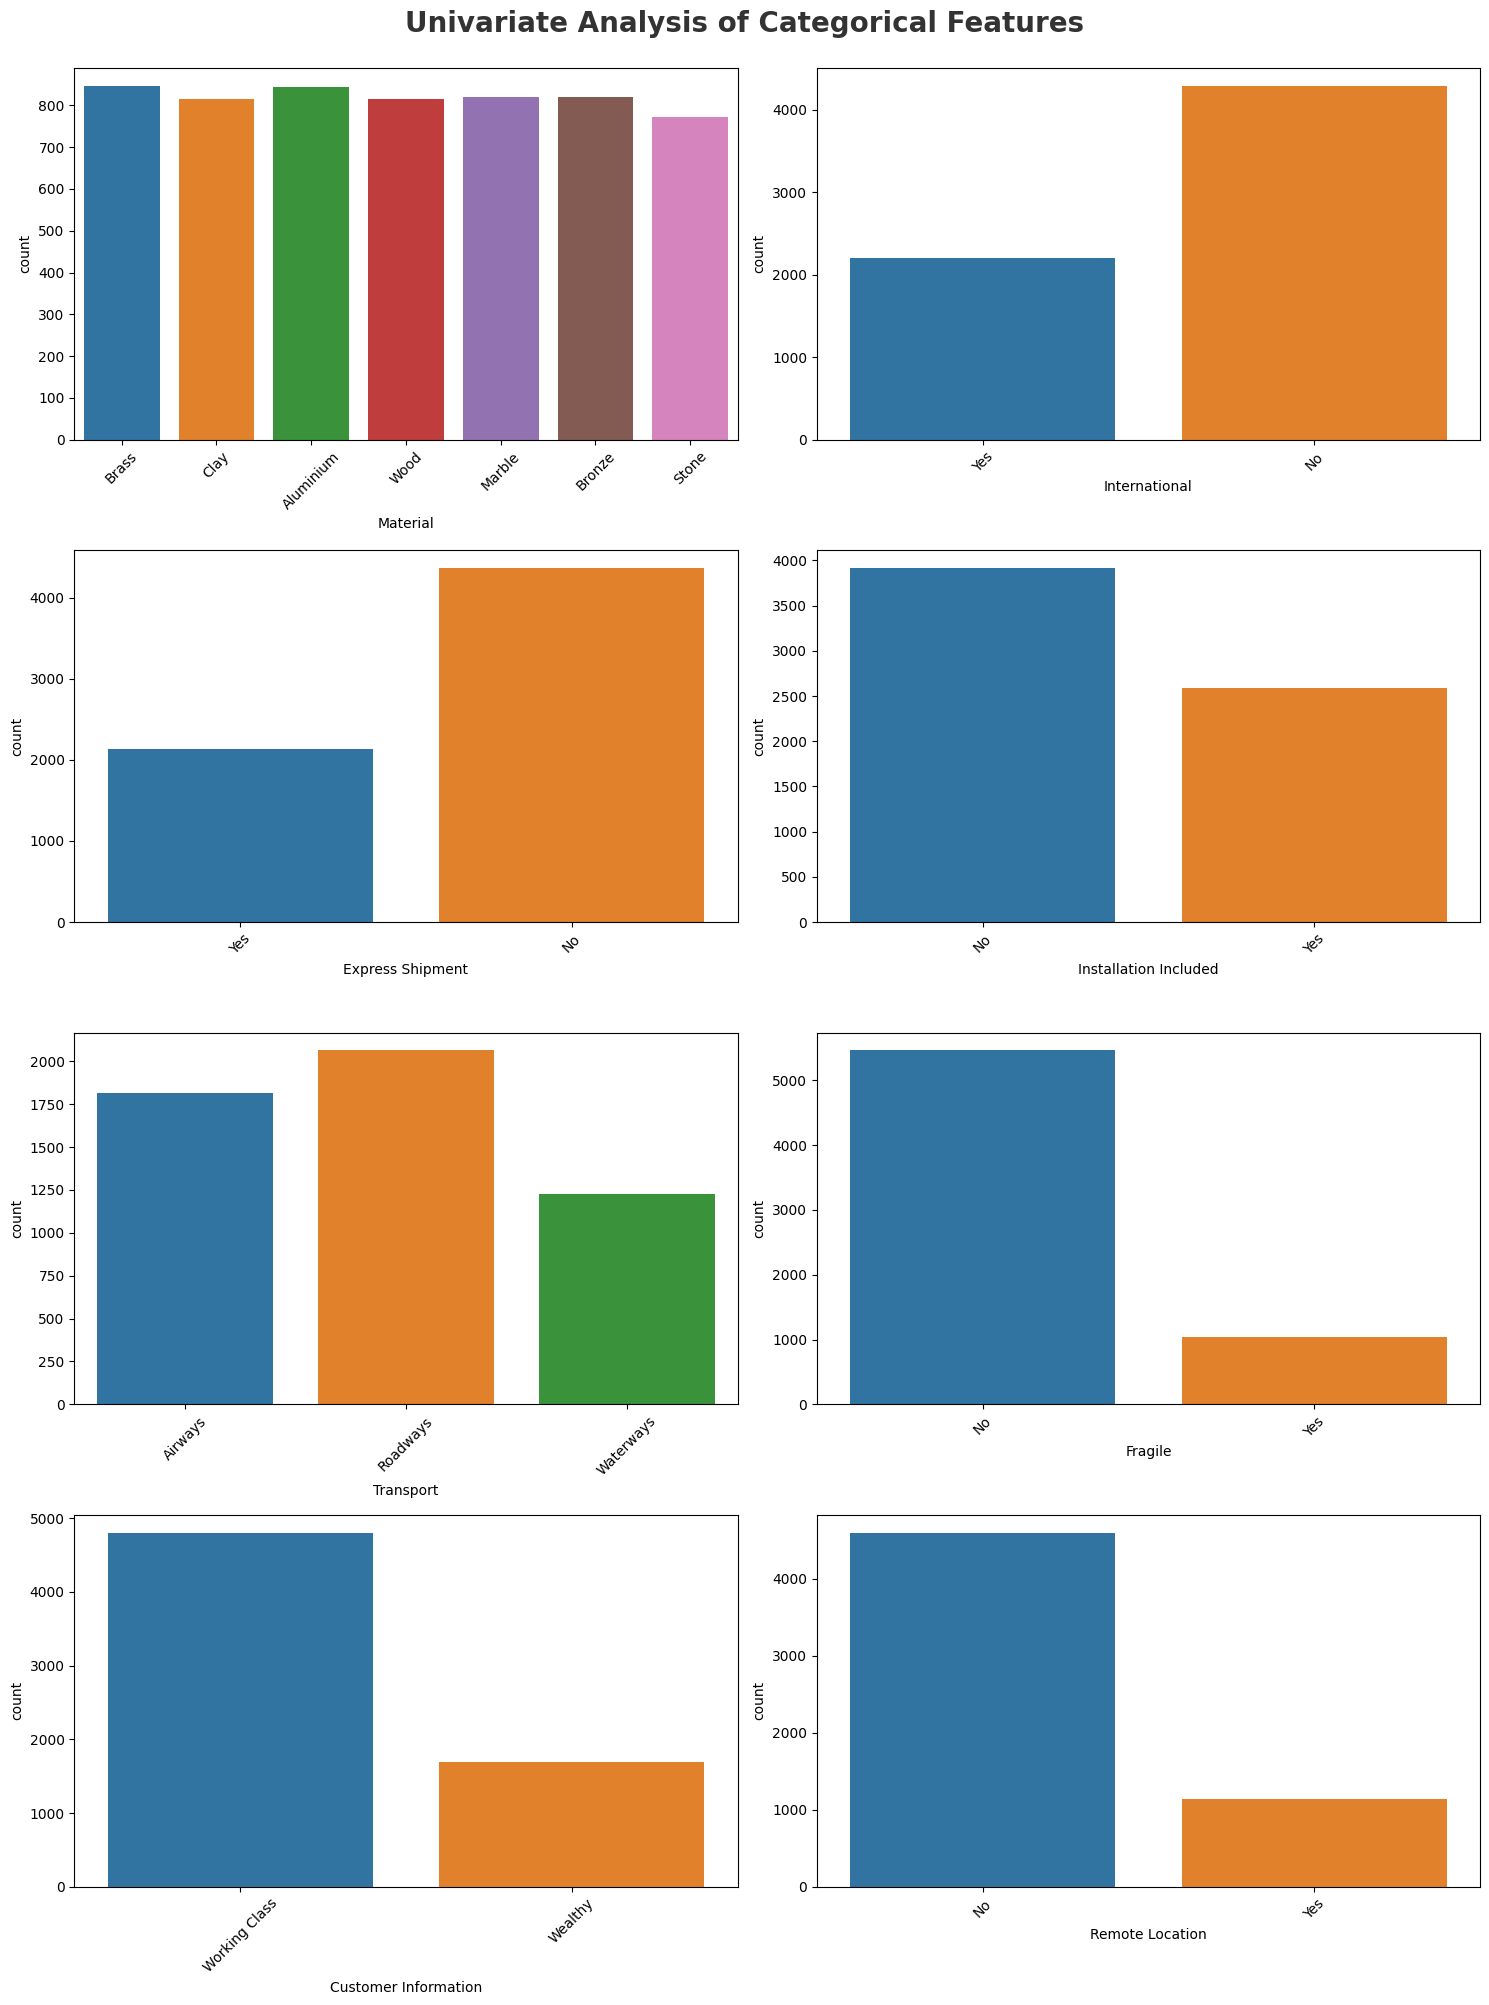

In [16]:
# categorical columns
plt.figure(figsize=(15, 20))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(categorical_columns)):
    plt.subplot(4, 2, i+1)
    sns.countplot(x=df[categorical_columns[i]])
    plt.xlabel(categorical_columns[i])
    plt.xticks(rotation=45)
    plt.tight_layout()
# countplot() method is used to display the count of categorical observations in each bin in the dataset.

'''
plt.subplot(nrows, ncols, index)

nrows: The number of rows in the grid.
ncols: The number of columns in the grid.
index: The position of the current plot in the grid.

'''

**Insights** 

* `Material column` has seven unique value, which are almost equally distributed</font> 

* There are 6 bi-variate categorical columns</font> 

<font size=3>**Checking the Null Values in dataset**</font> 


In [17]:
df.isnull().sum()

Customer Id                 0
Artist Name                 0
Artist Reputation         750
Height                    375
Width                     584
Weight                    587
Material                  764
Price Of Sculpture          0
Base Shipping Price         0
International               0
Express Shipment            0
Installation Included       0
Transport                1392
Fragile                     0
Customer Information        0
Remote Location           771
Scheduled Date              0
Delivery Date               0
Customer Location           0
Cost                        0
dtype: int64

In [18]:
df.isnull().sum()

Customer Id                 0
Artist Name                 0
Artist Reputation         750
Height                    375
Width                     584
Weight                    587
Material                  764
Price Of Sculpture          0
Base Shipping Price         0
International               0
Express Shipment            0
Installation Included       0
Transport                1392
Fragile                     0
Customer Information        0
Remote Location           771
Scheduled Date              0
Delivery Date               0
Customer Location           0
Cost                        0
dtype: int64

**Insights** 

- There are 7 columns which has null values

In [19]:
df['Cost'].head()

0   -283.29
1   -159.96
2   -154.29
3   -161.16
4   -159.23
Name: Cost, dtype: float64

In [20]:
import pandas as pd

# Assuming your data is already loaded into a DataFrame called df
# df = pd.read_csv('your_file.csv')

# Remove negative signs from the 'Cost' column by converting to absolute values
df['Cost'] = df['Cost'].abs()

# Optionally, you can save the modified DataFrame back to a CSV or another format
# df.to_csv('updated_file.csv', index=False)

print(df)


               Customer Id          Artist Name  Artist Reputation  Height  \
0     fffe3900350033003300        Billy Jenkins               0.26    17.0   
1     fffe3800330031003900          Jean Bryant               0.28     3.0   
2     fffe3600370035003100         Laura Miller               0.07     8.0   
3         fffe350031003300       Robert Chaires               0.12     9.0   
4     fffe3900320038003400         Rosalyn Krol               0.15    17.0   
...                    ...                  ...                ...     ...   
6495  fffe3800370037003300  Jeffrey Freudenthal               0.37    37.0   
6496      fffe310036003400        Larry Edwards               0.67    15.0   
6497  fffe3600300031003300         Denise Worth               0.68    19.0   
6498  fffe3600350035003900          Daniel Drew               0.02    33.0   
6499  fffe3700310031003600       Vernon Carroll               0.18    30.0   

      Width     Weight   Material  Price Of Sculpture  Base Shi

In [21]:
df.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",159.23


## Multivariate Analysis
* Multivariate analysis is the analysis of more than one variable.

<font size=4>**Correlation in Numerical Features**</font> 

In [22]:
import numpy as np

In [23]:
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
numeric_df.corr()  # Compute correlation matrix


,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
Artist Reputation,1.000000,-0.000513,-0.009203,0.017113,0.054286,-0.011820,0.071991
Height,-0.000513,1.000000,0.768376,0.226543,0.200942,0.353858,0.114737
Width,-0.009203,0.768376,1.000000,0.329603,0.293544,0.332361,0.166999
Weight,0.017113,0.226543,0.329603,1.000000,0.890205,0.150856,0.438959
Price Of Sculpture,0.054286,0.200942,0.293544,0.890205,1.000000,0.134407,0.491871
Base Shipping Price,-0.011820,0.353858,0.332361,0.150856,0.134407,1.000000,0.059591
Cost,0.071991,0.114737,0.166999,0.438959,0.491871,0.059591,1.000000


In [24]:
# df[(list(df.columns)[1:])].corr()
# giving error

In [25]:
numeric_df

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
0,0.26,17.0,6.0,4128.0,13.91,16.27,283.29
1,0.28,3.0,3.0,61.0,6.83,15.00,159.96
2,0.07,8.0,5.0,237.0,4.96,21.18,154.29
3,0.12,9.0,NaN,NaN,5.81,16.31,161.16
4,0.15,17.0,6.0,324.0,3.18,11.94,159.23
...,...,...,...,...,...,...,...
6495,0.37,37.0,10.0,16551.0,28.28,38.46,872.43
6496,0.67,15.0,NaN,18981.0,67.18,27.72,1347.02
6497,0.68,19.0,8.0,587.0,6.92,10.38,354.55
6498,0.02,33.0,9.0,1269377.0,2929.13,69.76,5037.50


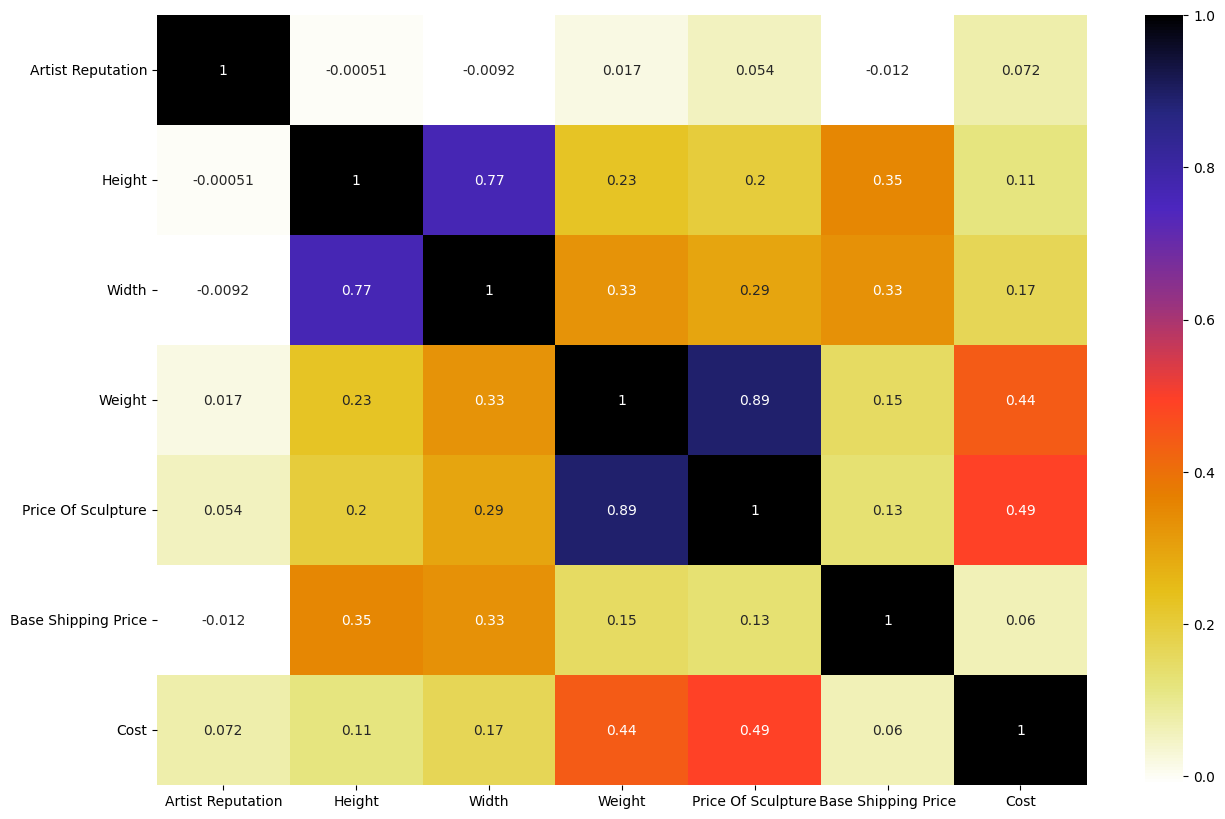

In [26]:
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df.corr(), cmap="CMRmap_r", annot=True)
plt.show()

In [27]:
'''
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap_r", annot=True)
plt.show()




'''


'\nplt.figure(figsize = (15,10))\nsns.heatmap(df.corr(), cmap="CMRmap_r", annot=True)\nplt.show()\n\n\n\n\n'

1. Physical attributes (weight, height, width) strongly influence the price and cost of sculptures, with weight being the most significant.
2. Artist reputation and shipping prices have comparatively minor effects on the total cost.

**Insights** 

- There is a high correlation between `Height`-`Width`, and `Weight`-`Price of Sculpture` 


### Relationship between target and numerical columns 

In [28]:
numeric_features

['Artist Reputation',
 'Height',
 'Width',
 'Weight',
 'Price Of Sculpture',
 'Base Shipping Price',
 'Cost']

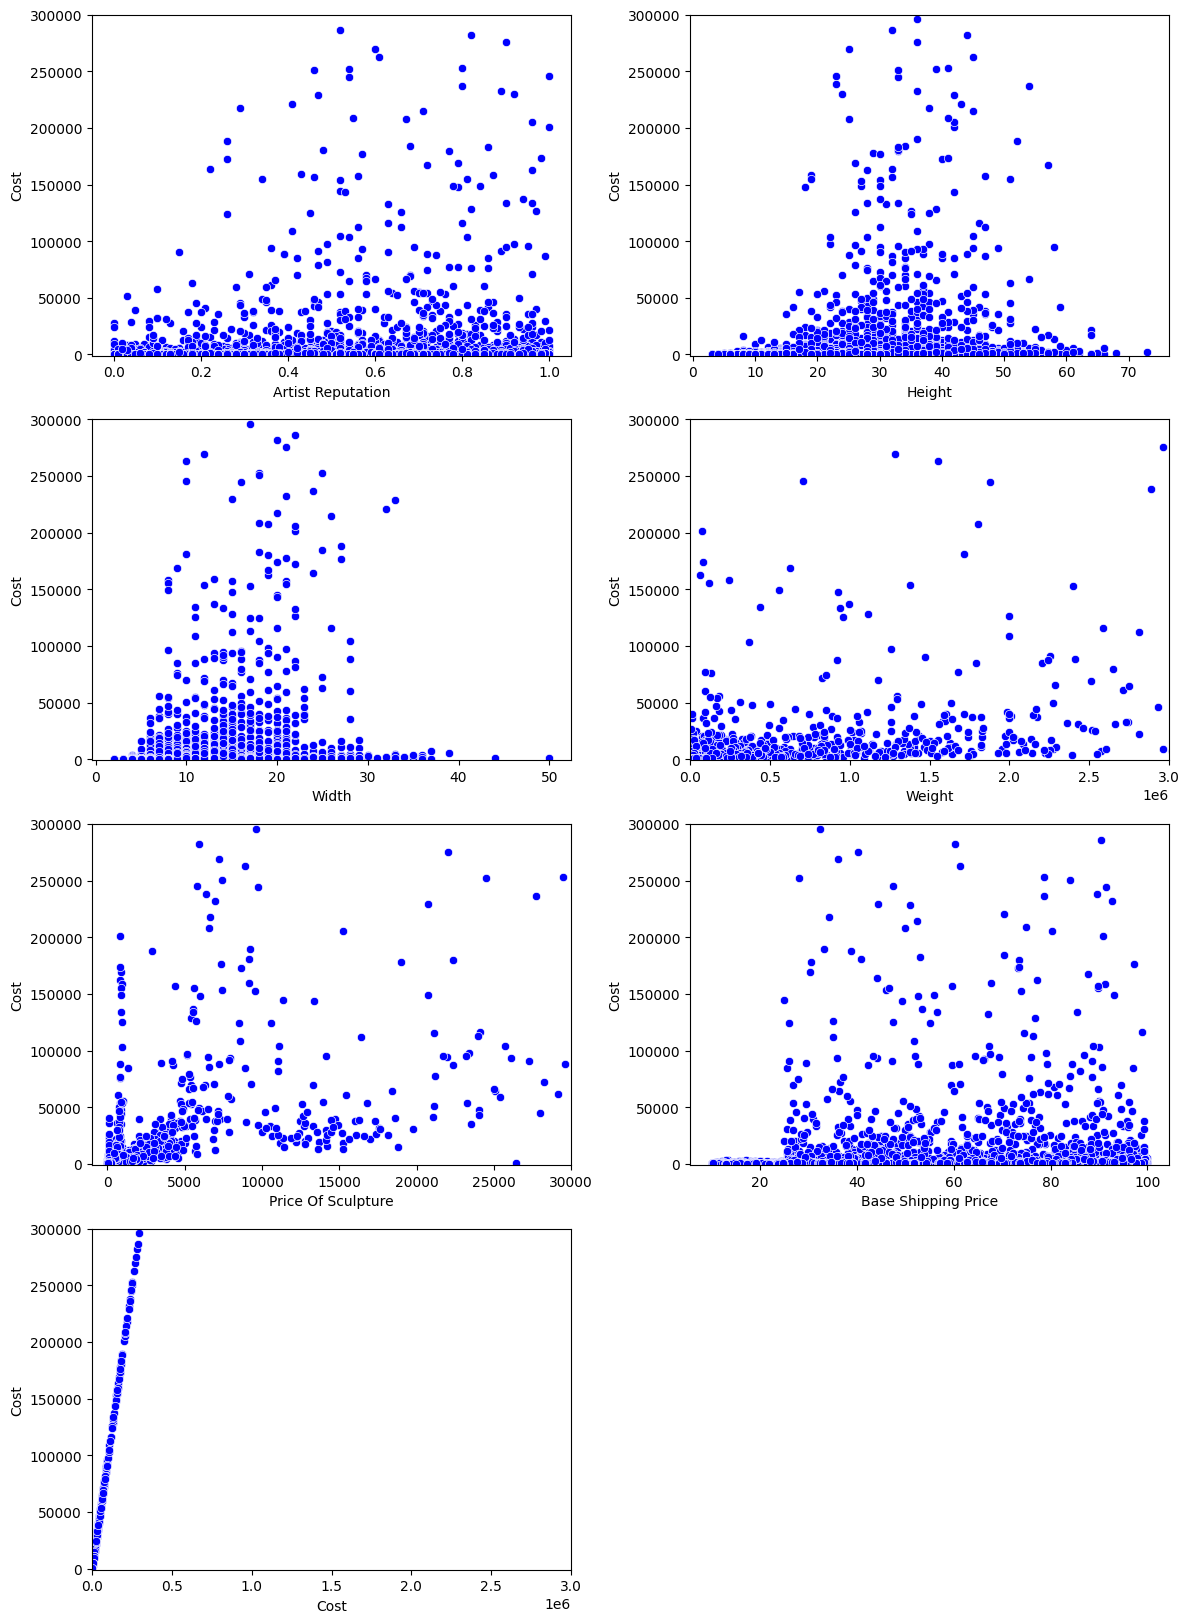

In [29]:
fig = plt.figure(figsize=(12, 24))

for i in range(0, len(numeric_features)):
    ax = plt.subplot(6, 2, i+1)
    sns.scatterplot(data= df ,y=target_feature, x=numeric_features[i], color='b')
    if df[numeric_features[i]].max() > 30000:
        plt.xlim(-1000,30000)
    if df[numeric_features[i]].max() > 3000000:
        plt.xlim(-1000,3000000)
    plt.ylim(-1000, 300000)
    plt.tight_layout()

1e6 means 1,000,000.

**Insights** 

- We can observe that there seems to be very low linear relationship between the independent and dependent features

- There seems to be linear relationship between Price of sculpture and the target column

1. It creates a series of scatter plots for each numeric feature against a target feature, arranging them in a 6x2 grid.
2. For each plot, it checks the range of the numeric feature's values. If the values exceed certain thresholds (30,000 or 300,000), it adjusts the x-axis limits accordingly.
3. The y-axis limit is fixed between -1000 and 300,000 for all plots to provide consistency in the visual comparison of scatter plots.
4. Finally, it ensures that the layout of the subplots is tidy and doesn't overlap.

## Visualizing Independent columns

<font size=3>**Target Feature**</font> 


In [30]:
target_feature

'Cost'

In [31]:
df.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",159.23


In [32]:
df[['Cost']]

,Cost
0,283.29
1,159.96
2,154.29
3,161.16
4,159.23
...,...
6495,872.43
6496,1347.02
6497,354.55
6498,5037.50


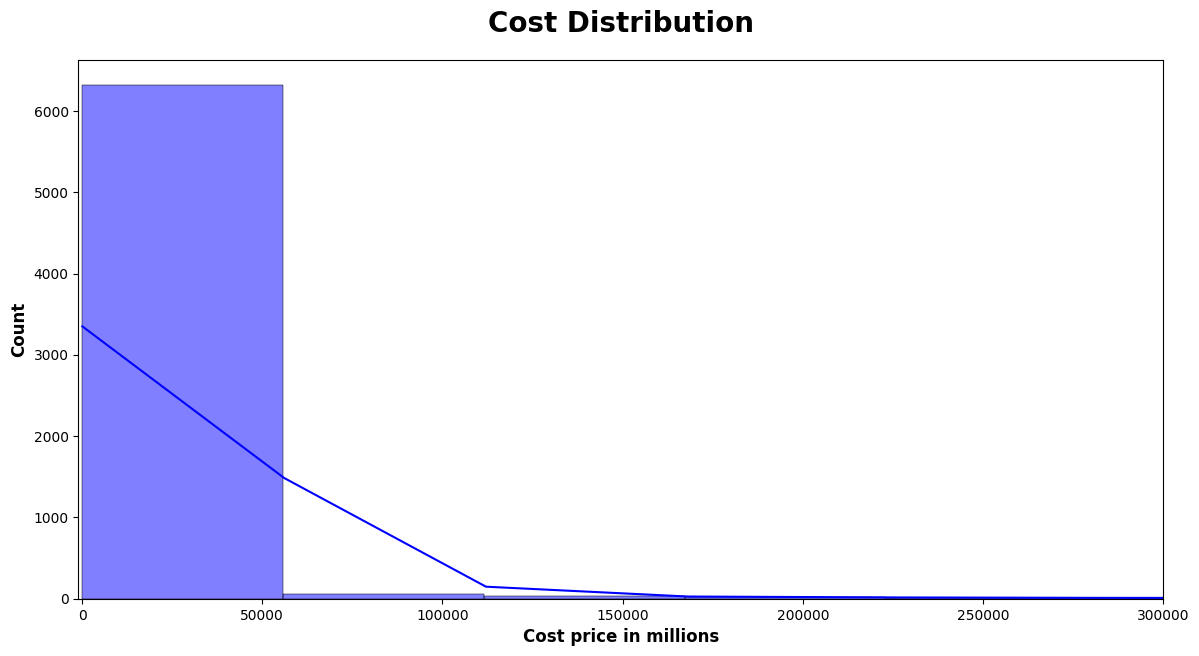

In [33]:
plt.subplots(figsize=(14,7))
sns.histplot(df[target_feature], bins=200, kde=True, color = 'b')
plt.title("Cost Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Cost price in millions", weight="bold", fontsize=12)
plt.xlim(-1000,300000)
plt.show()

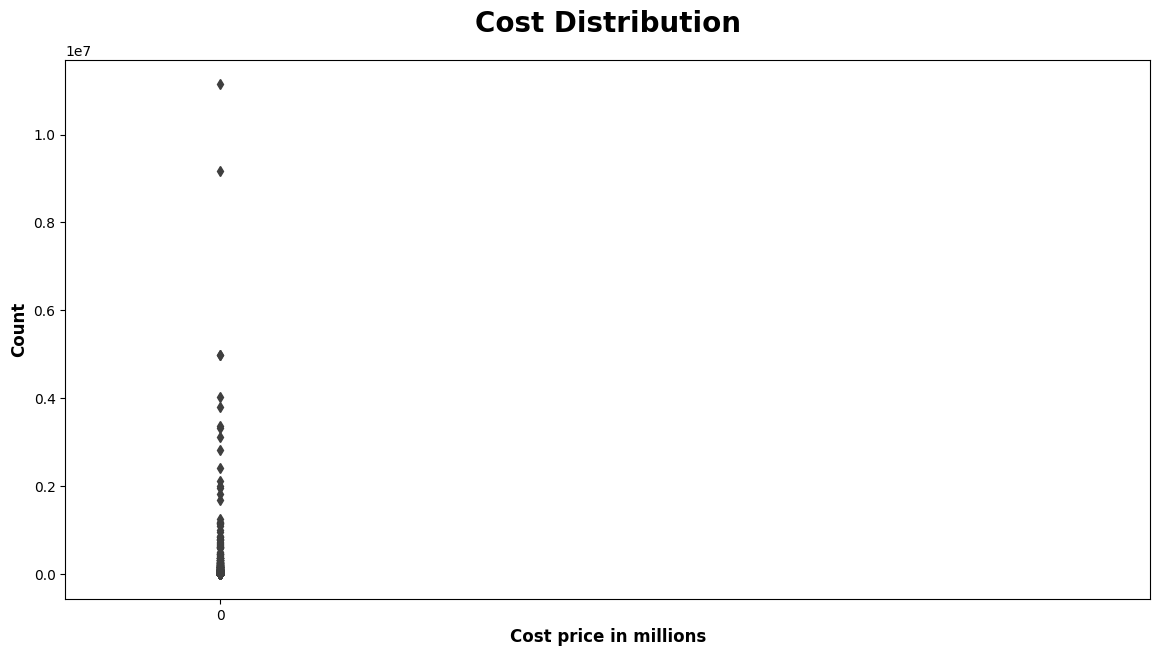

In [34]:
plt.subplots(figsize=(14,7))
sns.boxplot(df[target_feature])
plt.title("Cost Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Cost price in millions", weight="bold", fontsize=12)
plt.xlim(-50000,300000);

**Insights** 

- There are outliers in the target feature and we need to transform

<font size=3>**How shipment type is affecting cost of shipment?**</font> 


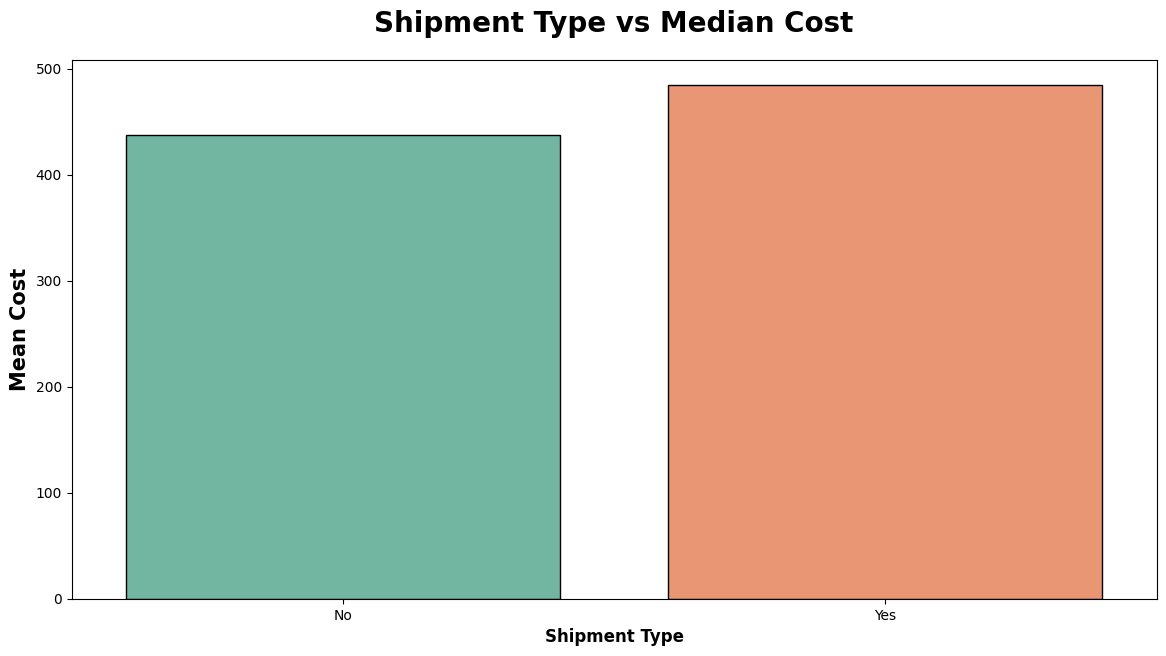

In [35]:
international = df.groupby('International')[target_feature].median()
international.to_frame()

plt.subplots(figsize=(14,7))
sns.barplot(x=international.index, y=international.values, ec = "black", palette="Set2")
plt.title("Shipment Type vs Median Cost", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mean Cost", weight="bold", fontsize=15)
plt.xlabel("Shipment Type", weight="bold", fontsize=12)
plt.show()

In [36]:
df['International'].value_counts()

International
No     4294
Yes    2206
Name: count, dtype: int64

In [37]:
international_shipment_median = df[df['International'] == 'Yes']['Cost'].median()
domestic_shipment_median = df[df['International'] == 'No']['Cost'].median()

print(f"The difference between the median shipment price of International and domestic is {international_shipment_median-domestic_shipment_median}")

The difference between the median shipment price of International and domestic is 47.14499999999998


**Insights**

- There is only a difference of 47 in the shipping cost between International and domestic, so it won't affect much at the prediction

- There are much more domestic shipement than international

<font size=3>**How Express Shipment is affecting cost of shipment?**</font> 


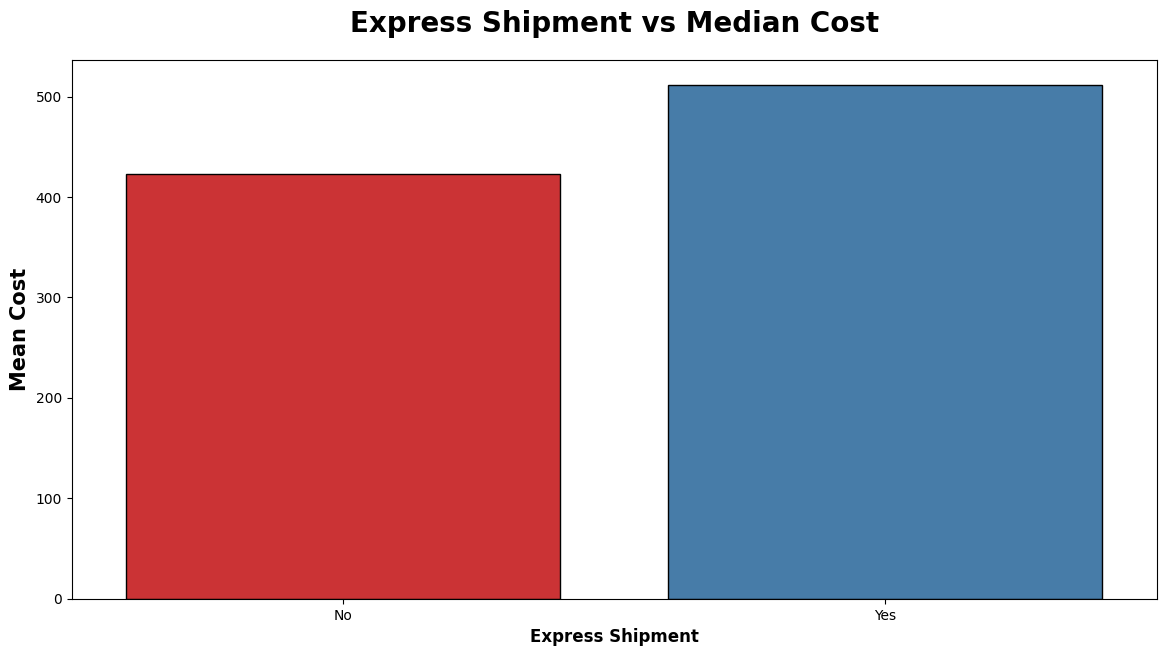

In [38]:
express_ship = df.groupby('Express Shipment')[target_feature].median()
express_ship.to_frame()

plt.subplots(figsize=(14,7))
sns.barplot(x=express_ship.index, y=express_ship.values, ec = "black", palette="Set1")
plt.title("Express Shipment vs Median Cost", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mean Cost", weight="bold", fontsize=15)
plt.xlabel("Express Shipment", weight="bold", fontsize=12)
plt.show()

In [39]:
df['Express Shipment'].value_counts()

Express Shipment
No     4365
Yes    2135
Name: count, dtype: int64

In [40]:
express_shipment_median = df[df['Express Shipment'] == 'Yes']['Cost'].median()
normal_shipment_median = df[df['Express Shipment'] == 'No']['Cost'].median()

print(f"The difference between the median shipment price of express shipment and normal shipment is {express_shipment_median-normal_shipment_median}")

The difference between the median shipment price of express shipment and normal shipment is 88.63999999999999


**Insights**

- In express shipment also, there is only a difference of 88 in the shipping cost between International and domestic, so it won't affect much at the prediction

- It's obvious that there are more normal delivery than express 

<font size=3>**How Installation included or not is affecting cost of shipment?**</font> 


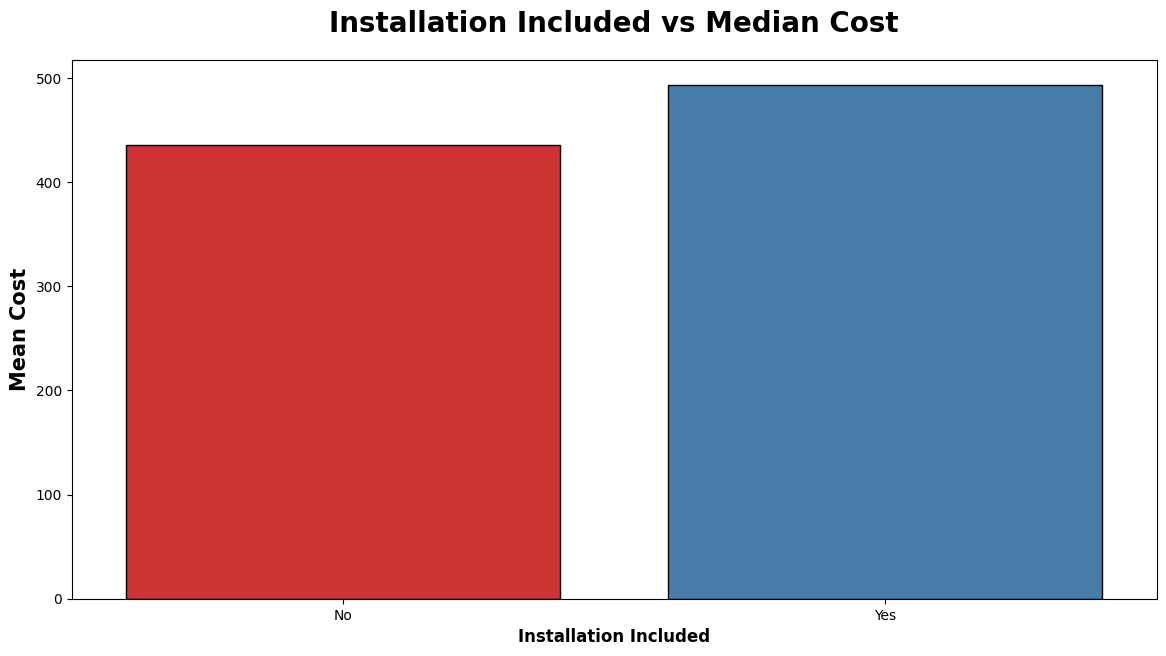

In [41]:
installation = df.groupby('Installation Included')[target_feature].median()
installation.to_frame()

plt.subplots(figsize=(14,7))
sns.barplot(x=installation.index, y=installation.values, ec = "black", palette="Set1")
plt.title("Installation Included vs Median Cost", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mean Cost", weight="bold", fontsize=15)
plt.xlabel("Installation Included", weight="bold", fontsize=12)
plt.show()

In [42]:
df['Installation Included'].value_counts()

Installation Included
No     3916
Yes    2584
Name: count, dtype: int64

In [43]:
installation_needed_median = df[df['Installation Included'] == 'Yes']['Cost'].median()
installation_not_needed_median = df[df['Installation Included'] == 'No']['Cost'].median()

print(f"The difference between the median shipment price of Installation Included and not is {installation_needed_median-installation_not_needed_median}")

The difference between the median shipment price of Installation Included and not is 57.56


**Insights** 

- There is only a difference of 57 which won't make much a difference at the time of prediction

- We can see that the charges for not installation is less and values are more, which says that a business should try to take contract which requires installation

<font size=3>**How Fragile Cost is affecting cost of shipment?**</font> 


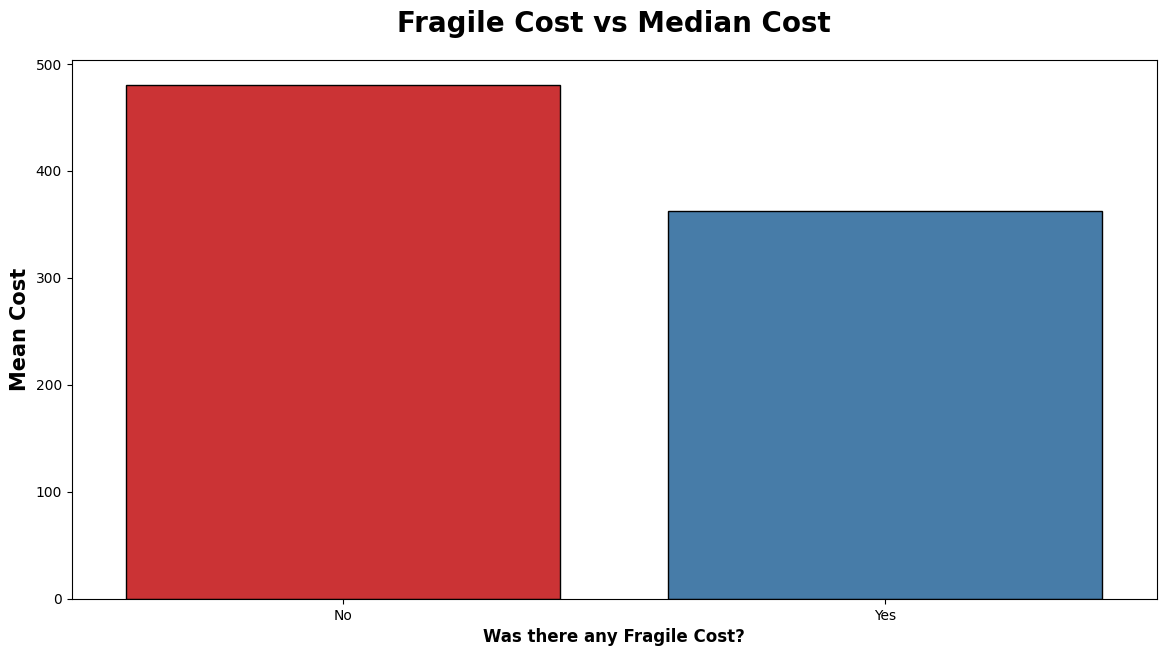

In [44]:
fragile = df.groupby('Fragile')[target_feature].median()
fragile.to_frame()

plt.subplots(figsize=(14,7))
sns.barplot(x=fragile.index, y=fragile.values, ec = "black", palette="Set1")
plt.title("Fragile Cost vs Median Cost", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mean Cost", weight="bold", fontsize=15)
plt.xlabel("Was there any Fragile Cost?", weight="bold", fontsize=12)
plt.show()

In [45]:
fragile_median = df[df['Fragile'] == 'Yes']['Cost'].median()
fragile_not_median = df[df['Fragile'] == 'No']['Cost'].median()

print(f"The difference between the median shipment price of Fragile cost and non-fragile cost is {fragile_median-fragile_not_median}")

The difference between the median shipment price of Fragile cost and non-fragile cost is -117.54000000000002


**Insights**

- There is only a difference of -117 which says that the median cost is more if there is no fragile cost and because the number is small it won't make much of a difference at the time of training model

<font size=3>**How delivery location is affecting cost of shipment?**</font> 


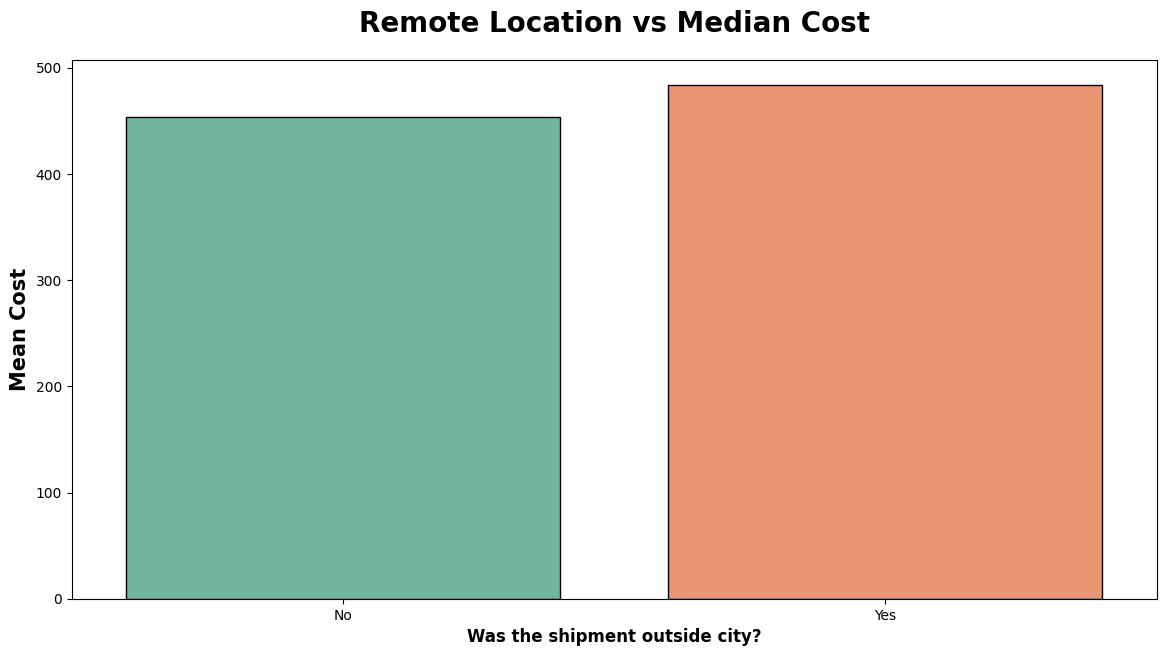

In [46]:
remote = df.groupby('Remote Location')[target_feature].median()
remote.to_frame()

plt.subplots(figsize=(14,7))
sns.barplot(x=remote.index, y=remote.values, ec = "black", palette="Set2")
plt.title("Remote Location vs Median Cost", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mean Cost", weight="bold", fontsize=15)
plt.xlabel("Was the shipment outside city?", weight="bold", fontsize=12)
plt.show()

In [47]:
remote_median = df[df['Remote Location'] == 'Yes']['Cost'].median()
not_remote_median = df[df['Remote Location'] == 'No']['Cost'].median()

print(f"The difference between the median shipment price of remote shipment and non-remote shipment cost is {remote_median-not_remote_median}")

The difference between the median shipment price of remote shipment and non-remote shipment cost is 30.039999999999964


**Insights** 

- There is only a difference of 30 which won't make much a difference at the time of prediction


<font size=3>**How Customer Financial condition is affecting cost of shipment?**</font> 


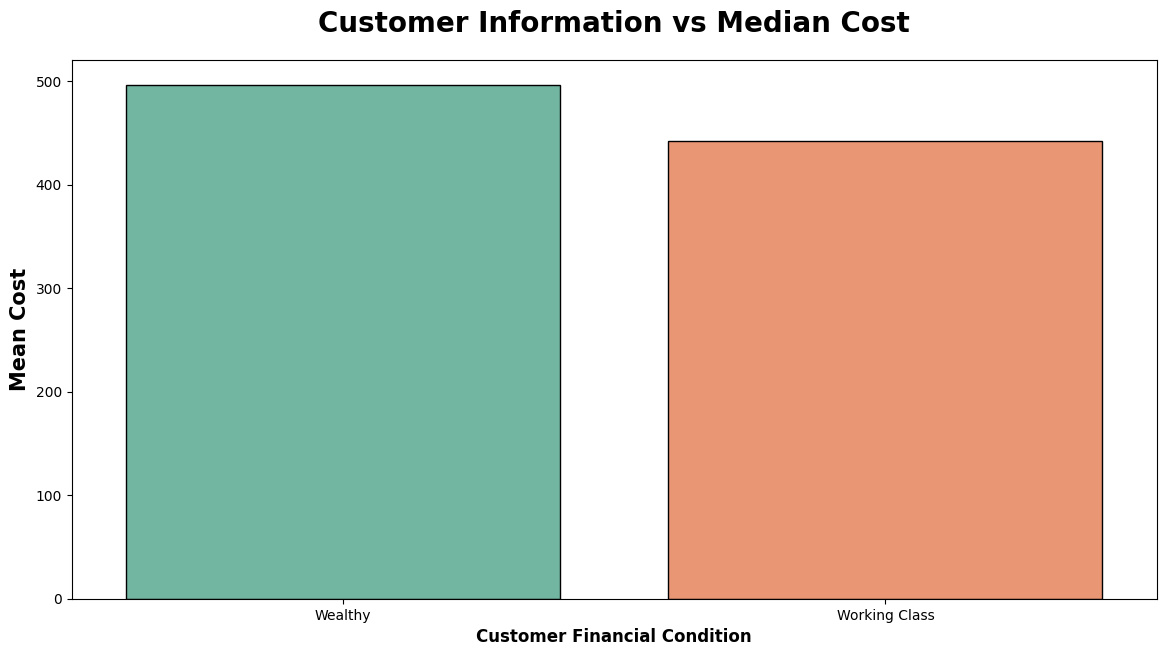

In [48]:
cust_info = df.groupby('Customer Information')[target_feature].median()
cust_info.to_frame()

plt.subplots(figsize=(14,7))
sns.barplot(x=cust_info.index, y=cust_info.values, ec = "black", palette="Set2")
plt.title("Customer Information vs Median Cost", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mean Cost", weight="bold", fontsize=15)
plt.xlabel("Customer Financial Condition", weight="bold", fontsize=12)
plt.show()

In [49]:
customer_info_wealthy_median = df[df['Customer Information'] == 'Wealthy']['Cost'].median()
customer_info_working_class_median = df[df['Customer Information'] == 'Working Class']['Cost'].median()


print(f"The difference between the median shipment price of remote shipment and non-remote shipment cost is {customer_info_wealthy_median-customer_info_working_class_median}")

The difference between the median shipment price of remote shipment and non-remote shipment cost is 53.79000000000002


**Insights**

- There is only a difference of 53 which won't make much a difference at the time of prediction


<font size=3>**Report**</font> 

<font size=3>After understanding relationship between the target column and categorical columns, that there doesn't seem to be much pattern, which model can find in the categorical columns also</font>

## Visualizing date columns


In [50]:
df.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",159.23


In [51]:
# Example for specifying a custom format, if needed
df['Scheduled Date'] = pd.to_datetime(df['Scheduled Date'])
df['Delivery Date'] = pd.to_datetime(df['Delivery Date'])


C:\Users\HP\AppData\Local\Temp\ipykernel_9212\3840098429.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Scheduled Date'] = pd.to_datetime(df['Scheduled Date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_9212\3840098429.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Delivery Date'] = pd.to_datetime(df['Delivery Date'])


In [52]:
df['year'] = pd.DatetimeIndex(df['Scheduled Date']).year
df['month'] = pd.DatetimeIndex(df['Scheduled Date']).month

In [53]:
df.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,...,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost,year,month
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,...,Airways,No,Working Class,No,2015-06-07,2015-06-03,"New Michelle, OH 50777",283.29,2015,6
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,...,Roadways,No,Working Class,No,2017-03-06,2017-03-05,"New Michaelport, WY 12072",159.96,2017,3
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,...,Roadways,Yes,Working Class,Yes,2015-03-09,2015-03-08,"Bowmanshire, WA 19241",154.29,2015,3
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,...,NaN,No,Wealthy,Yes,2015-05-24,2015-05-20,"East Robyn, KY 86375",161.16,2015,5
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,...,Airways,No,Working Class,No,2016-12-18,2016-12-14,"Aprilside, PA 52793",159.23,2016,12


In [54]:
x = df.groupby(["year", "month"])["Cost"].mean()
df_wide = x.unstack().T
df_wide.head()

year,2015,2016,2017,2018,2019
month,,,,,
1,2053.048800,12995.124775,22083.677721,47649.295370,2518.749307
2,34377.345000,10076.009636,4379.685102,6732.662525,4083.460926
3,23952.461926,10852.203429,41940.158881,20623.359504,2989.961495
4,94906.846034,5427.128174,28059.725806,4846.126392,8942.566116
5,16724.825500,4206.195586,13864.754274,17827.414622,16871.824222


In [55]:
x

year  month
2015  1          2053.048800
      2         34377.345000
      3         23952.461926
      4         94906.846034
      5         16724.825500
      6          7590.896916
      7          2270.111905
      8         18794.436000
      9          5559.294194
      10         5121.943131
      11        53628.157000
      12        40139.098962
2016  1         12995.124775
      2         10076.009636
      3         10852.203429
      4          5427.128174
      5          4206.195586
      6         15963.755979
      7          5614.431752
      8         10217.218678
      9         20096.879821
      10        21561.719000
      11        13864.754667
      12         2859.432276
2017  1         22083.677721
      2          4379.685102
      3         41940.158881
      4         28059.725806
      5         13864.754274
      6        123149.882000
      7         37961.125234
      8         12257.803482
      9          6634.911058
      10        10535.064609
  

In [56]:
x.unstack()
# unstack() is used to pivot or reshape a DataFrame by converting one level of the index into columns.

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2015,2053.048800,34377.345000,23952.461926,94906.846034,16724.825500,7590.896916,2270.111905,18794.436000,5559.294194,5121.943131,53628.157000,40139.098962
2016,12995.124775,10076.009636,10852.203429,5427.128174,4206.195586,15963.755979,5614.431752,10217.218678,20096.879821,21561.719000,13864.754667,2859.432276
2017,22083.677721,4379.685102,41940.158881,28059.725806,13864.754274,123149.882000,37961.125234,12257.803482,6634.911058,10535.064609,50718.269091,8014.642712
2018,47649.295370,6732.662525,20623.359504,4846.126392,17827.414622,6723.282883,11315.132193,6442.494915,32708.215210,24339.232500,5540.592985,5714.922348
2019,2518.749307,4083.460926,2989.961495,8942.566116,16871.824222,8862.773396,9758.057857,6006.702553,NaN,NaN,NaN,NaN


In [57]:
df_wide[2015]

month
1      2053.048800
2     34377.345000
3     23952.461926
4     94906.846034
5     16724.825500
6      7590.896916
7      2270.111905
8     18794.436000
9      5559.294194
10     5121.943131
11    53628.157000
12    40139.098962
Name: 2015, dtype: float64

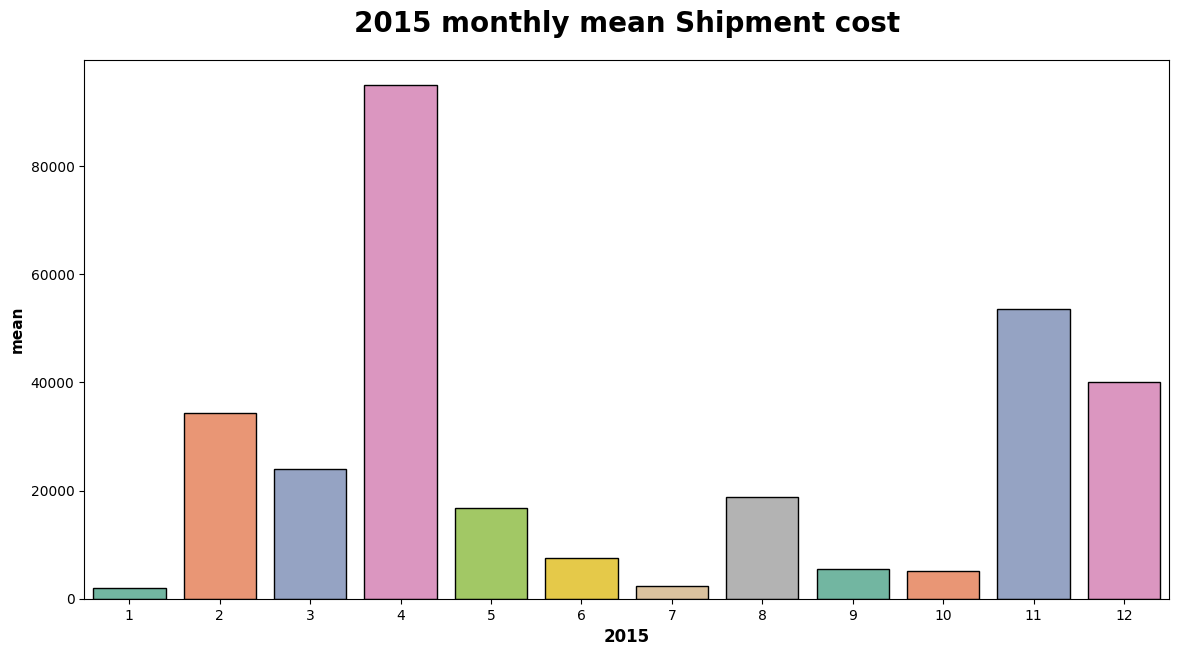

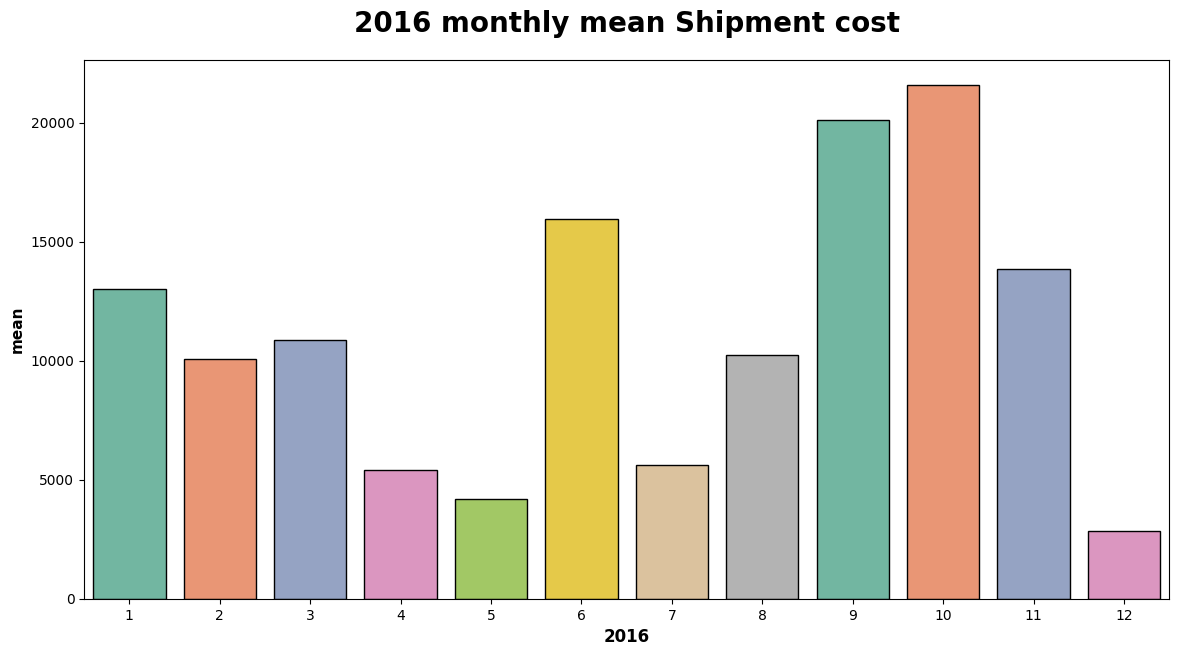

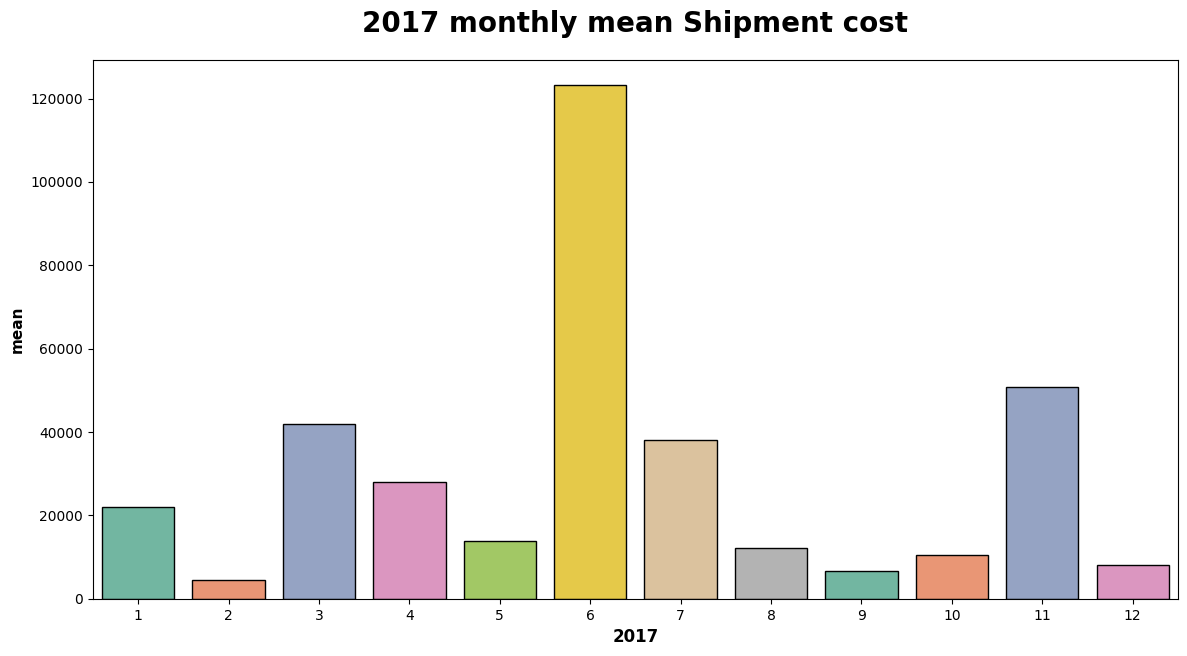

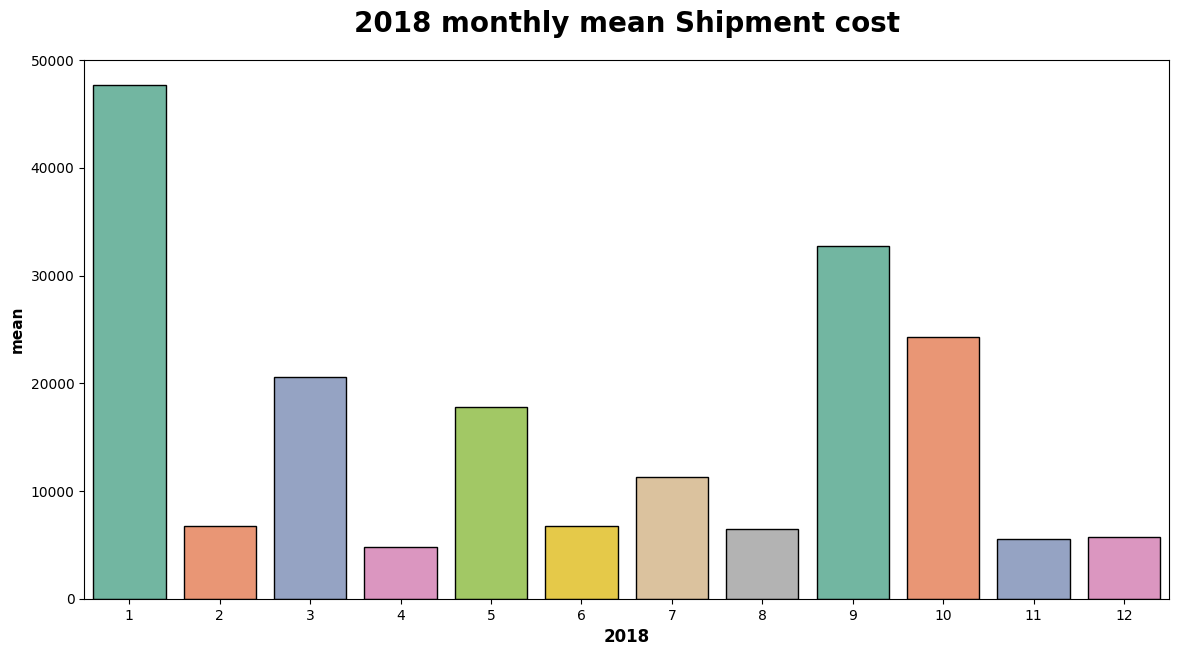

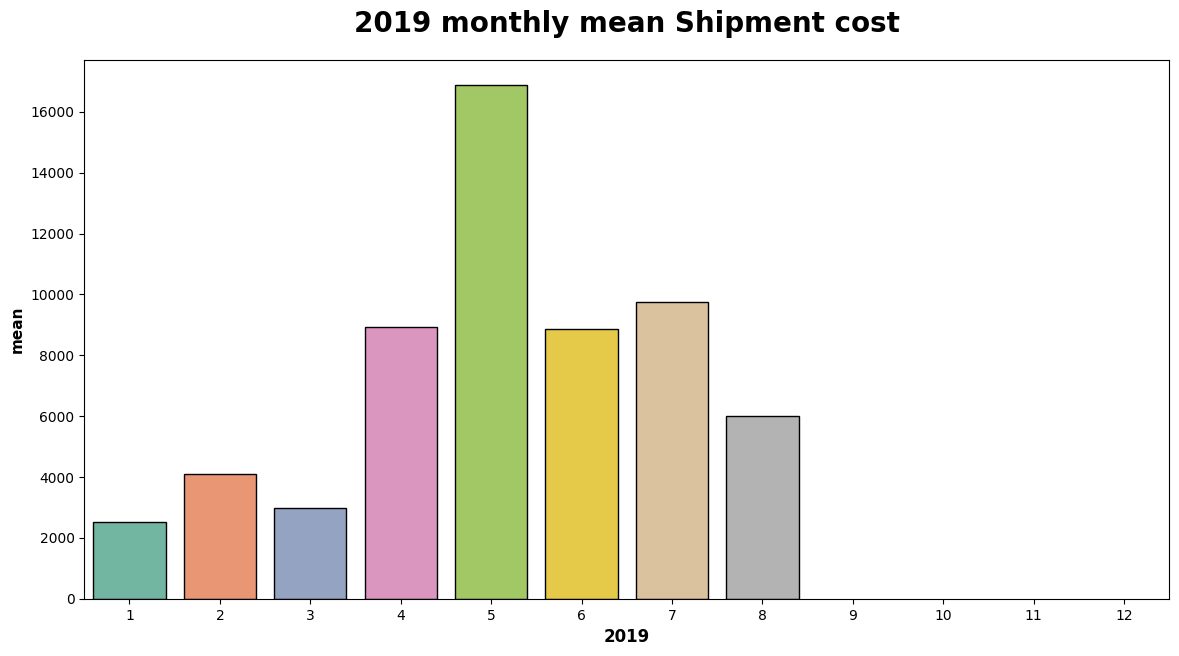

In [58]:
for i in df_wide.columns:
    plt.subplots(figsize=(14,7))
    sns.barplot(y=df_wide[i],x=df_wide.index,ec = "black", palette="Set2")
    plt.title(str(i) + " monthly mean Shipment cost", weight="bold",fontsize=20, pad=20)
    plt.ylabel("mean", weight="bold", fontsize=11)
    plt.xlabel(i, weight="bold", fontsize=12)
    plt.show()

**Insights**
 - Monthly distribution of every year is different
 - For 2015, 2016 and 2018 There were more cost at the start and end of the year.
 - For 2017 and 2019 cost were high mid year.

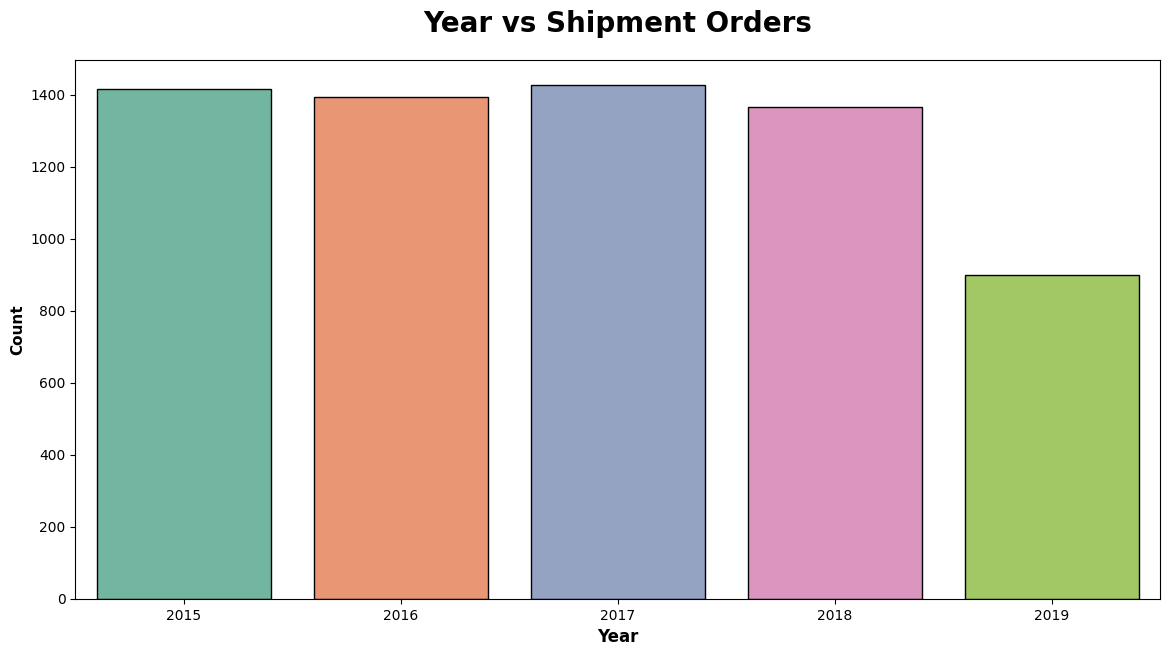

In [59]:
plt.subplots(figsize=(14,7))
sns.countplot(x=df.year,ec = "black", palette="Set2")
plt.title("Year vs Shipment Orders", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=11)
plt.xlabel("Year", weight="bold", fontsize=12)
plt.show()

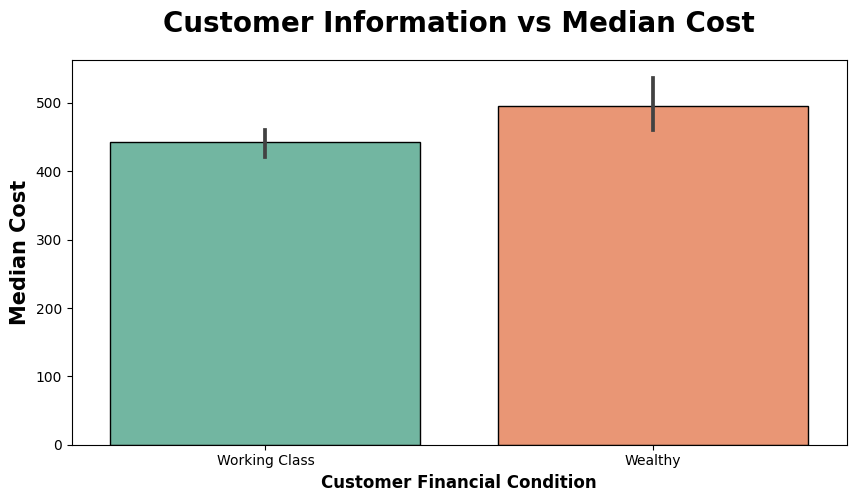

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming df has a column 'Customer_Financial_Condition' and 'Cost'
plt.subplots(figsize=(10,5))

# Using barplot to show the median cost for each customer financial condition (Wealthy vs Working Class)
sns.barplot(x='Customer Information', y='Cost', data=df, estimator=np.median, ec="black", palette="Set2")

# Setting the title and labels
plt.title("Customer Information vs Median Cost", weight="bold", fontsize=20, pad=20)
plt.ylabel("Median Cost", weight="bold", fontsize=15)
plt.xlabel("Customer Financial Condition", weight="bold", fontsize=12)

# Show the plot
plt.show()


# Final Report


* The `Cost` column is the target to predict.
* The target variable here is continuous.
* There are outliers in some columns we have to remove outliers.
* `date` column should be configured to extract `year` and `month`.
* Null values in `Artist Reputation`, `Height`, `Width`, `Weight`, `Material`, `Transport`, `Remote Location` needs to be handled